In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb

17464789/17464789 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56

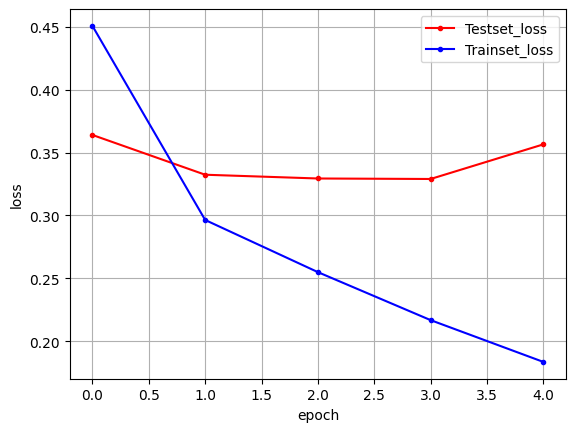

In [3]:
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train,y_train),(X_test,y_test)= imdb.load_data(num_words=5000)
X_train =sequence.pad_sequences(X_train,maxlen=100)
X_test= sequence.pad_sequences(X_test,maxlen=100)

## 모델의 설정
model=Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history= model.fit(X_train,y_train,batch_size=100,epochs=5, validation_data=(X_test,y_test))

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test,y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
X_len = np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker = '.',c ='red', label ='Testset_loss')
plt.plot(X_len, y_loss, marker = '.',c ='blue', label ='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()